# Project 2

In [75]:
import numpy as np
import scipy.sparse as sp
np.random.seed(12)

import warnings
#Comment this to turn on warnings
warnings.filterwarnings('ignore')

from utils import generateDesignmatrix
from model_comparison import model_comparison
import algorithms
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn
%matplotlib inline
#%matplotlib notebook

Calculating the coupeling coefficient J. 

Want to predict the energy with E = X*J

In [76]:
### define Ising model aprams
# system size
L=40

# create 10000 random Ising states
states=np.random.choice([-1, 1], size=(10000,L))

def ising_energies(states,L):
    """
    This function calculates the energies of the states in the nn Ising Hamiltonian
    """
    J=np.zeros((L,L),)
    for i in range(L):
        J[i,(i+1)%L]-=1.0
    # compute energies
    E = np.einsum('...i,ij,...j->...',states,J,states)

    return E
# calculate Ising energies
energies=ising_energies(states,L)

"""
Comparing to project 1 - x = states, z = energies... 
Currently no y since we are in one dimension. 

"""

'\nComparing to project 1 - x = states, z = energies... \nCurrently no y since we are in one dimension. \n\n'

In [77]:
states.min(), states.max() #spin down, spin up

(-1, 1)

In [78]:
energies.min(), energies.max()

(-20.0, 20.0)

## OBS OBS copy

In [62]:
# reshape Ising states into RL samples: S_iS_j --> X_p
states=np.einsum('...i,...j->...ij', states, states)
shape=states.shape
states=states.reshape((shape[0],shape[1]*shape[2])) 
# build final data set
Data=[states,energies]

# define number of samples
n_samples=600
# define train and test data sets
X_train=Data[0][:n_samples]
Y_train=Data[1][:n_samples] #+ np.random.normal(0,4.0,size=X_train.shape[0])
X_test=Data[0][n_samples:3*n_samples//2]
Y_test=Data[1][n_samples:3*n_samples//2] #+ np.random.normal(0,4.0,size=X_test.shape[0])

In [63]:
energies

array([  4., -12.,   4., ...,   0.,  -8.,   8.])

In [64]:
# The above example splits before the regression. 
X = Data[0]
Y = Data[1]
"""
Lignende mengde data --> sjekka at coefficentene.
 evt split_size """
np.shape(X)

(10000, 1600)

# Regression analysis - part b)

In [65]:
# Experimental setup
models = {
    "ols": algorithms.OLS,
    #"ols": LinearRegression,
    'ridge': algorithms.Ridge, 
    "lasso": algorithms.Lasso
}
param_grid = {
    'ols': [0],
    'ridge': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100, 10**3, 10**4, 10**5],  
    'lasso': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100, 10**3, 10**4, 10**5]
}

# Might be a good idea to update if split_size = 0 --> do fit and predict on testdata only.
results, z_pred_best, coeffs = model_comparison(
    models, param_grid, X_train, Y_train, split_size=0.33333333
    )

Testing model: ols
Testing model: ridge
Testing model: lasso
1


In [66]:
results.keys()

dict_keys(['mse_test', 'mse_train', 'r2_test', 'r2_train'])

In [84]:
results["r2_test"]["lasso"]

[[0.40262349314656787,
  0.9999985545083317,
  0.9998558155572687,
  0.9855848114103795,
  0.07061504423701315,
  -0.018673830214775755,
  -0.018673830214775755,
  -0.018673830214775755,
  -0.018673830214775755,
  -0.018673830214775755]]

In [68]:
results["r2_test"]["ols"]

[[0.5617376490041186]]

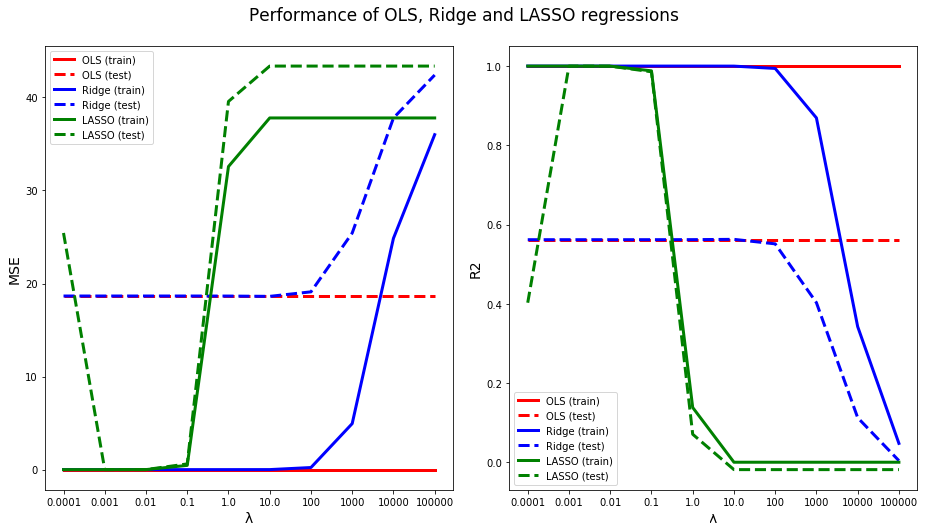

In [79]:
# Generate figure

# MSE
plt.figure(1, figsize = (13,7))
plt.subplot(1,2,1)
xlogr = np.log10(param_grid['ridge'])  # log x-axis
plt.plot(xlogr, (results["mse_train"]["ols"]*np.ones(len(xlogr))).T, 'r', label='OLS (train)', linewidth=3.0) 
plt.plot(xlogr, (results["mse_test"]["ols"]*np.ones(len(xlogr))).T, 'r--', label='OLS (test)',  linewidth=3.0) 
plt.plot(xlogr, np.asarray(results["mse_train"]["ridge"]).T, 'b', label='Ridge (train)', linewidth=3.0) 
plt.plot(xlogr, np.asarray(results["mse_test"]["ridge"]).T, 'b--', label='Ridge (test)', linewidth=3.0) 
plt.plot(xlogr, np.asarray(results["mse_train"]["lasso"]).T, 'g', label='LASSO (train)', linewidth=3.0) 
plt.plot(xlogr, np.asarray(results["mse_test"]["lasso"]).T, 'g--', label='LASSO (test)', linewidth=3.0) 
ax = plt.gca()
plt.xticks(np.asarray(xlogr))
ax.set_xticklabels(param_grid['ridge'])
plt.xlabel('λ', fontsize=14)
plt.ylabel('MSE', fontsize=14)
plt.legend()

# R-squared
plt.subplot(1,2,2)
plt.plot(xlogr, (results["r2_train"]["ols"]*np.ones(len(xlogr))).T, 'r', label='OLS (train)', linewidth=3.0) 
plt.plot(xlogr, (results["r2_test"]["ols"]*np.ones(len(xlogr))).T, 'r--', label='OLS (test)', linewidth=3.0) 
plt.plot(xlogr, np.asarray(results["r2_train"]["ridge"]).T, 'b', label='Ridge (train)', linewidth=3.0) 
plt.plot(xlogr, np.asarray(results["r2_test"]["ridge"]).T, 'b--', label='Ridge (test)', linewidth=3.0) 
plt.plot(xlogr, np.asarray(results["r2_train"]["lasso"]).T, 'g', label='LASSO (train)', linewidth=3.0) 
plt.plot(xlogr, np.asarray(results["r2_test"]["lasso"]).T, 'g--', label='LASSO (test)', linewidth=3.0) 
ax = plt.gca()
plt.xticks(np.asarray(xlogr))
ax.set_xticklabels(param_grid['ridge'])
plt.xlabel('λ', fontsize=14)
plt.ylabel('R2', fontsize=14)
plt.legend()
plt.suptitle("Performance of OLS, Ridge and LASSO regressions", y=1.05, fontsize=17)
plt.savefig("results/figures/metric_regression_on_allData.png")
plt.tight_layout()    
plt.show()

The same amount of trainingdata and testdata creates a almost similar plot Metha et al has the test line on 0.6 while we have it at 0.5617. Should be good enough.

# Plotting the coefficient of regression which is the coupling coefficient J

* Need to get olscoeff.reshape((40,40))
* Need to get the betas as output.

In [70]:
J_ols = coeffs["ols"][0][0].reshape((40,40))
J_ridge = np.array(coeffs["ridge"][0][1]).reshape((40,40))
J_lasso = coeffs["lasso"][0][1].reshape((40,40))

In [71]:
#np.shape(coeffs["ridge"])
#lmbda = param_grid["ridge"]
#idx_lmd = 1
#J_ridge = coeffs["ridge"][0][idx_lmd].reshape((40,40))

## Results:

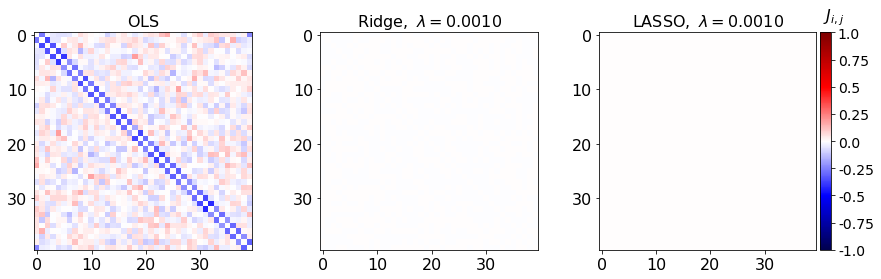

In [83]:
cmap_args=dict(vmin=-1., vmax=1., cmap='seismic')
#fig = plt.figure(figsize = (6,12))
fig, axarr = plt.subplots(nrows=1, ncols=3) #, figsize=(15,15)

axarr[0].imshow(J_ols,**cmap_args)
axarr[0].set_title('$\\mathrm{OLS}$',fontsize=16)
axarr[0].tick_params(labelsize=16)

axarr[1].imshow(J_ridge,**cmap_args)
axarr[1].set_title('$\\mathrm{Ridge}, \ \\lambda= %.4f$' %(lmbda[1]),fontsize=16) # %(lmbda)
axarr[1].tick_params(labelsize=16)

im=axarr[2].imshow(J_lasso,**cmap_args)
axarr[2].set_title('$\\mathrm{LASSO},\ \\lambda=%.4f $' %(lmbda[1]) ,fontsize=16) #%(lmbda)
axarr[2].tick_params(labelsize=16)

divider = make_axes_locatable(axarr[2])
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar=fig.colorbar(im, cax=cax)

cbar.ax.set_yticklabels(np.arange(-1.0, 1.0+0.25, 0.25),fontsize=14)
cbar.set_label('$J_{i,j}$',labelpad=-40, y=1.12,fontsize=16,rotation=0)
fig.subplots_adjust(right=2.0)
#fig.savefig("./results/figures/best_lambdas_one_dim.png")


# Appendix: all lambdavalues

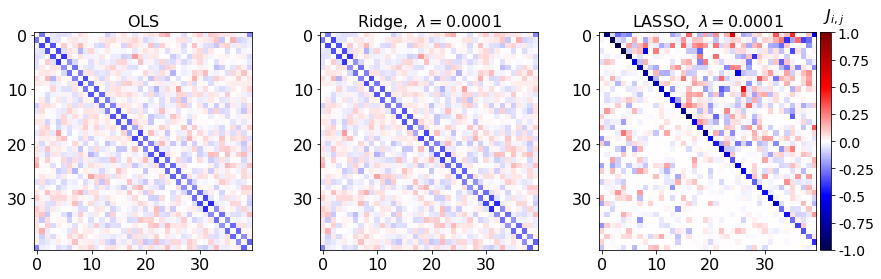

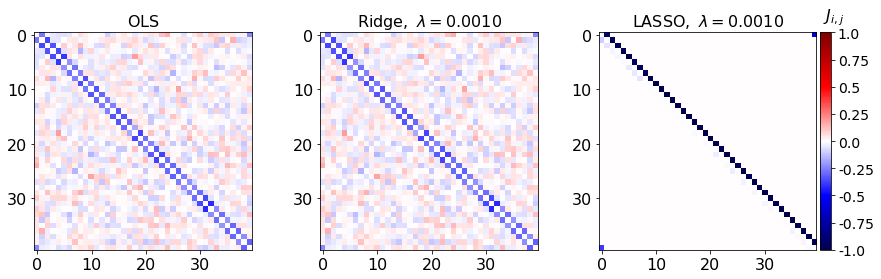

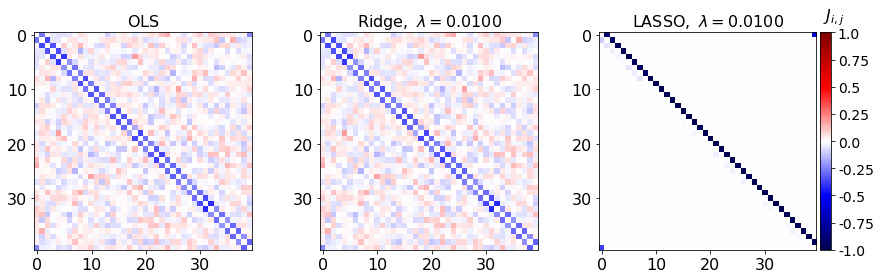

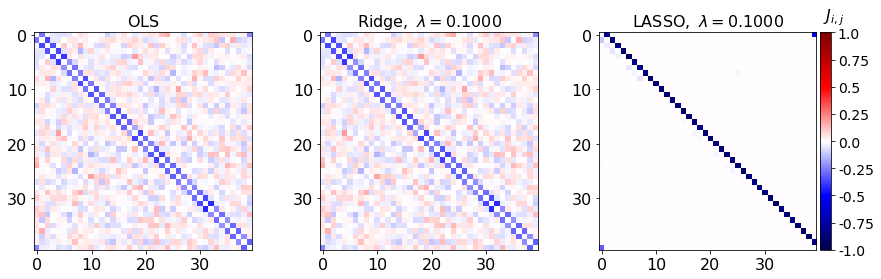

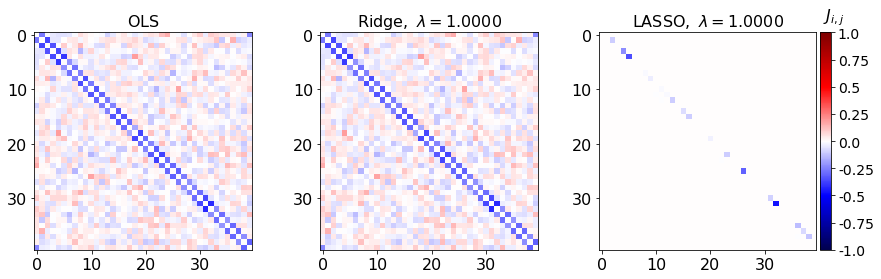

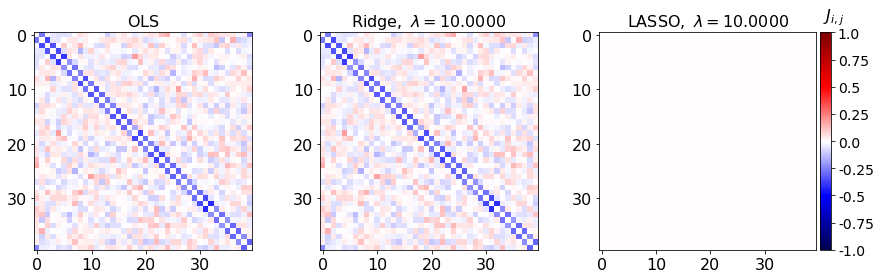

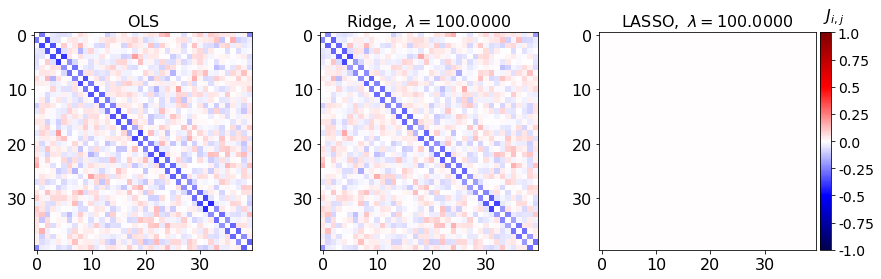

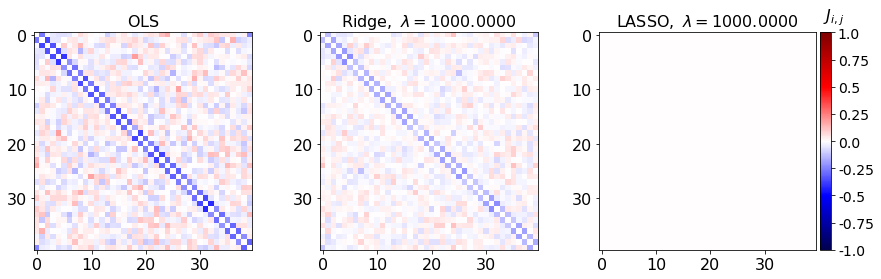

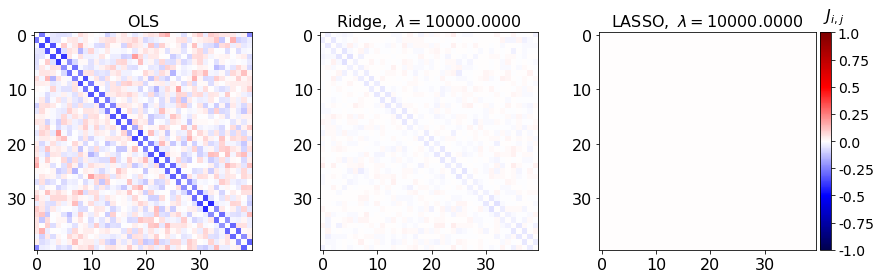

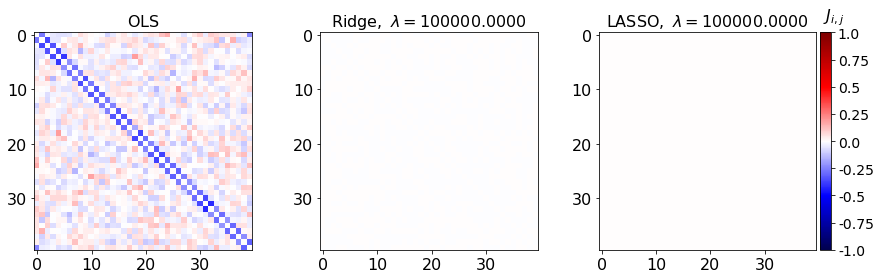

In [82]:
cmap_args=dict(vmin=-1., vmax=1., cmap='seismic')
counter = 0
plt.figure(figsize = (10,6))
for lmd in lmbda:
    fig, axarr = plt.subplots(nrows=1, ncols=3)
    
    J_ols = coeffs["ols"][0][0].reshape((40,40))
    J_ridge = np.array(coeffs["ridge"][0][counter]).reshape((40,40))
    J_lasso = coeffs["lasso"][0][counter].reshape((40,40))
    
    counter += 1
    
    axarr[0].imshow(J_ols,**cmap_args)
    axarr[0].set_title('$\\mathrm{OLS}$',fontsize=16)
    axarr[0].tick_params(labelsize=16)

    axarr[1].imshow(J_ridge,**cmap_args)
    axarr[1].set_title('$\\mathrm{Ridge}, \ \\lambda= %.4f$' %(lmd),fontsize=16) # %(lmbda)
    axarr[1].tick_params(labelsize=16)

    im=axarr[2].imshow(J_lasso,**cmap_args)
    axarr[2].set_title('$\\mathrm{LASSO},\ \\lambda=%.4f $' %(lmd) ,fontsize=16) #%(lmbda)
    axarr[2].tick_params(labelsize=16)

    divider = make_axes_locatable(axarr[2])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar=fig.colorbar(im, cax=cax)

    cbar.ax.set_yticklabels(np.arange(-1.0, 1.0+0.25, 0.25),fontsize=14)
    cbar.set_label('$J_{i,j}$',labelpad=-40, y=1.12,fontsize=16,rotation=0)
    fig.subplots_adjust(right=2.0)
    
fig.savefig("./results/figures/all_lambdas_one_dim.png")
plt.show()